In [ ]:
# !pip install mediapipe

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import os
import warnings
import cv2
import mediapipe as mp

Read Data from csv file

In [2]:
PreparedData_train= pd.read_csv('Prepared_Data_train.csv')
PreparedData_test= pd.read_csv('Prepared_Data_test.csv')

In [3]:
PreparedData_train
# PreparedData_test

,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,...,distance_128,distance_129,distance_130,distance_131,distance_132,distance_133,distance_134,distance_135,distance_136,labels
0,163.779694,91.169861,146.453796,103.604561,41.397285,26.569262,53.641598,157.573517,157.992249,158.932190,...,151.495880,126.962822,58.803360,20.431931,68.538559,124.941536,54.426525,121.739151,80.930710,0
1,165.724884,92.697098,148.730042,105.450661,41.662292,26.747046,54.026131,157.205170,157.821182,159.079407,...,153.557236,130.232910,62.440636,20.618986,71.597733,126.150940,56.788689,122.254723,80.697327,0
2,146.461777,73.788849,130.862411,86.401634,28.464228,15.736864,39.900604,137.142990,140.134384,142.713577,...,140.257767,121.950905,66.354767,18.159061,58.572670,100.870148,45.479759,97.262398,63.730740,0
3,141.966492,80.233467,120.507202,91.394699,30.586710,18.238525,41.047897,134.986069,135.666748,136.236221,...,133.059097,108.923592,53.128841,16.978106,56.972797,102.900734,46.473064,100.978928,64.182426,0
4,141.282349,79.056503,117.123848,89.853615,30.666964,18.520103,40.846916,133.869568,134.584976,135.242630,...,131.788391,108.276039,52.370922,16.516668,56.616970,102.407143,46.297825,100.558800,64.307671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,171.051300,107.201256,153.020233,121.116653,37.638618,21.311468,51.576748,162.578995,162.654312,163.382690,...,162.709290,135.814575,70.445221,21.971836,87.636833,143.209396,71.006187,136.481857,83.180634,1
634,172.112976,104.728745,152.733414,118.751465,37.368786,21.075872,51.197098,162.881927,162.957825,163.558975,...,163.692764,137.492493,70.647102,21.822168,86.320824,142.299118,69.819778,135.909515,84.028801,1
635,172.412277,104.717155,153.251053,118.838753,37.507103,21.189474,51.356438,163.396515,163.590942,164.253250,...,163.891373,137.670181,70.581703,21.830339,85.899277,142.029007,69.368416,135.621597,84.057358,1
636,172.656525,104.919342,153.148041,119.143280,37.890064,21.557217,51.725838,163.518539,163.716522,164.413101,...,164.067963,137.882736,70.537918,21.878210,86.321289,142.285553,69.762215,135.918671,84.244087,1


Check which rows are all 0.0 values

In [4]:
def is_row_all_zero_except_label(df):
    return (df.drop('labels', axis=1) == 0).all(axis=1)

In [5]:
# Check for null rows in CombinedData_train
null_rows_train = is_row_all_zero_except_label(PreparedData_train)
print("Null rows in PrepareddData_train:")
print(PreparedData_train[null_rows_train].to_string)

# Check for null rows in CombinedData_test
null_rows_test = is_row_all_zero_except_label(PreparedData_test)
print("Null rows in PreparedData_test:")
# print(PreparedData_test[null_rows_test].to_string)

Null rows in PrepareddData_train:
<bound method DataFrame.to_string of      distance_1  distance_2  distance_3  distance_4  distance_5  distance_6  \
10          0.0         0.0         0.0         0.0         0.0         0.0   
17          0.0         0.0         0.0         0.0         0.0         0.0   
27          0.0         0.0         0.0         0.0         0.0         0.0   
42          0.0         0.0         0.0         0.0         0.0         0.0   
52          0.0         0.0         0.0         0.0         0.0         0.0   
..          ...         ...         ...         ...         ...         ...   
488         0.0         0.0         0.0         0.0         0.0         0.0   
497         0.0         0.0         0.0         0.0         0.0         0.0   
526         0.0         0.0         0.0         0.0         0.0         0.0   
544         0.0         0.0         0.0         0.0         0.0         0.0   
565         0.0         0.0         0.0         0.0         

In [6]:
PreparedData_train.loc[null_rows_train]

,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,...,distance_128,distance_129,distance_130,distance_131,distance_132,distance_133,distance_134,distance_135,distance_136,labels
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Updata Data when remove null values in rows

In [7]:
# Remove null rows from CombinedData_train and reset the index
PreparedData_train = PreparedData_train[~null_rows_train].reset_index(drop=True)

# Remove null rows from CombinedData_test and reset the index
PreparedData_test = PreparedData_test[~null_rows_test].reset_index(drop=True)

PreparedData_train


,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,...,distance_128,distance_129,distance_130,distance_131,distance_132,distance_133,distance_134,distance_135,distance_136,labels
0,163.779694,91.169861,146.453796,103.604561,41.397285,26.569262,53.641598,157.573517,157.992249,158.932190,...,151.495880,126.962822,58.803360,20.431931,68.538559,124.941536,54.426525,121.739151,80.930710,0
1,165.724884,92.697098,148.730042,105.450661,41.662292,26.747046,54.026131,157.205170,157.821182,159.079407,...,153.557236,130.232910,62.440636,20.618986,71.597733,126.150940,56.788689,122.254723,80.697327,0
2,146.461777,73.788849,130.862411,86.401634,28.464228,15.736864,39.900604,137.142990,140.134384,142.713577,...,140.257767,121.950905,66.354767,18.159061,58.572670,100.870148,45.479759,97.262398,63.730740,0
3,141.966492,80.233467,120.507202,91.394699,30.586710,18.238525,41.047897,134.986069,135.666748,136.236221,...,133.059097,108.923592,53.128841,16.978106,56.972797,102.900734,46.473064,100.978928,64.182426,0
4,141.282349,79.056503,117.123848,89.853615,30.666964,18.520103,40.846916,133.869568,134.584976,135.242630,...,131.788391,108.276039,52.370922,16.516668,56.616970,102.407143,46.297825,100.558800,64.307671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,171.051300,107.201256,153.020233,121.116653,37.638618,21.311468,51.576748,162.578995,162.654312,163.382690,...,162.709290,135.814575,70.445221,21.971836,87.636833,143.209396,71.006187,136.481857,83.180634,1
559,172.112976,104.728745,152.733414,118.751465,37.368786,21.075872,51.197098,162.881927,162.957825,163.558975,...,163.692764,137.492493,70.647102,21.822168,86.320824,142.299118,69.819778,135.909515,84.028801,1
560,172.412277,104.717155,153.251053,118.838753,37.507103,21.189474,51.356438,163.396515,163.590942,164.253250,...,163.891373,137.670181,70.581703,21.830339,85.899277,142.029007,69.368416,135.621597,84.057358,1
561,172.656525,104.919342,153.148041,119.143280,37.890064,21.557217,51.725838,163.518539,163.716522,164.413101,...,164.067963,137.882736,70.537918,21.878210,86.321289,142.285553,69.762215,135.918671,84.244087,1


In [8]:
PreparedData_train.iloc[526]

distance_1      138.298798
distance_2      100.457832
distance_3      111.273109
distance_4      111.890152
distance_5       19.522932
                   ...    
distance_133    125.858162
distance_134     72.951042
distance_135    119.632225
distance_136     64.874657
labels            1.000000
Name: 526, Length: 137, dtype: float64

Save file npz 

In [9]:

# Define the custom directory where you want to save the .npz files
save_directory = "D:\Abnormal_Behavior\Source\Data"


# Specify the file paths for the DataFrames
combined_data_train_path = os.path.join(save_directory, 'Preprocessed_Data_train.npz')
combined_data_test_path = os.path.join(save_directory, 'Preprocessed_Data_test.npz')

# Save CombinedData_train to its .npz file
np.savez(combined_data_train_path, landmarks=PreparedData_train.iloc[:,:-1], labels = PreparedData_train.iloc[:,-1])

# Save CombinedData_test to its .npz file
np.savez(combined_data_test_path, landmarks=PreparedData_test.iloc[:,:-1], labels = PreparedData_test.iloc[:,-1])

Check imbalanced data


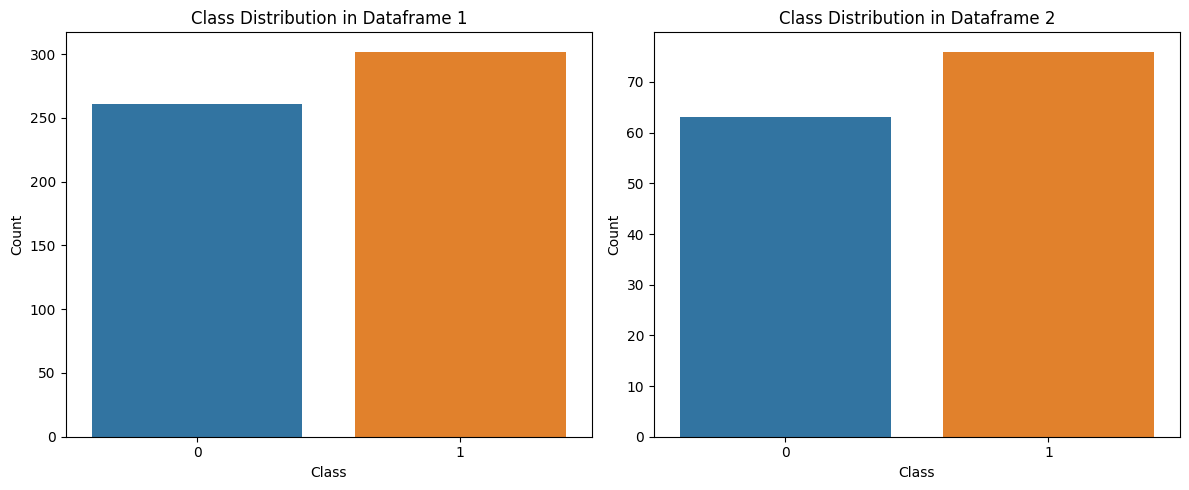

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_class_distribution(dataframe1, dataframe2):
    # Count the number of samples in each class for the first dataframe
    class_counts1 = dataframe1['labels'].value_counts()

    # Count the number of samples in each class for the second dataframe
    class_counts2 = dataframe2['labels'].value_counts()

    # Create subplots to visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for the first dataframe
    sns.barplot(x=class_counts1.index, y=class_counts1, ax=axes[0])
    axes[0].set_title("Class Distribution in Dataframe 1")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")

    # Plot for the second dataframe
    sns.barplot(x=class_counts2.index, y=class_counts2, ax=axes[1])
    axes[1].set_title("Class Distribution in Dataframe 2")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

visualize_class_distribution(PreparedData_train, PreparedData_test)


Kernel Density Plots to visualize values in data.


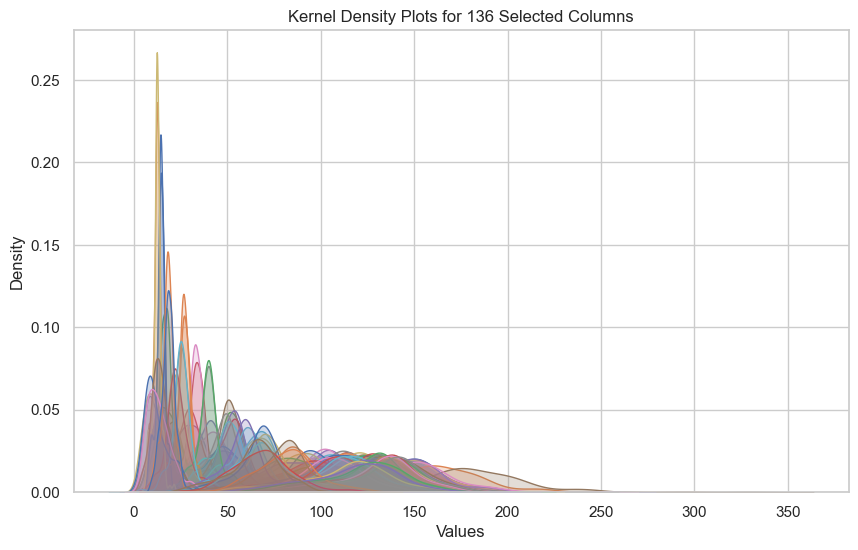

In [23]:



def visualize_kde_plots(dataframe):
    # Create a subset of the DataFrame by excluding the 'labels' column
    subset = dataframe.drop(columns=['labels'], errors='ignore')

    # Create Kernel Density Plots for the selected columns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    for column in subset.columns:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")  # Ignore all warnings
            sns.kdeplot(subset[column], label=column, shade=True)

    plt.title("Kernel Density Plots for 136 Selected Columns")
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.show()

visualize_kde_plots(PreparedData_train)


PCA_FUNCTION


In [12]:


def perform_pca(input_df, n_components=3):
    # Create a PCA model
    pca = PCA(n_components=n_components)

    # Fit the PCA model to the input DataFrame
    pca_result = pca.fit_transform(input_df)

    # Create a new DataFrame with the PCA components
    pca_df = pd.DataFrame(data=pca_result, columns=[f'f{i+1}' for i in range(n_components)])

    return pca_df

In [13]:
pca_PreparedData_train = perform_pca(PreparedData_train.drop(columns=['labels']), n_components=3)
pca_PreparedData_train = pd.concat([pca_PreparedData_train, PreparedData_train['labels']], axis=1)

print("pca_CombinedData_train:  ")
print(pca_PreparedData_train)
# --------------------------------------------------------

pca_PreparedData_test= perform_pca(PreparedData_test.drop(columns=['labels']), n_components=3)
pca_PreparedData_test = pd.concat([pca_PreparedData_test, PreparedData_test['labels']], axis=1)

print("pca_CombinedData_test:  ")
print(pca_PreparedData_test)

pca_CombinedData_train:  
             f1         f2         f3  labels
0    115.945230 -38.056912 -62.951484       0
1    130.680469 -38.550720 -51.627929       0
2     18.578879 -90.230103 -36.248098       0
3    -66.652021 -53.045561 -64.062709       0
4    -82.089327 -55.199073 -67.690066       0
..          ...        ...        ...     ...
558  226.479533  -9.325632 -22.701674       1
559  230.145678 -19.597155 -26.050511       1
560  233.344338 -20.380624 -27.522586       1
561  233.871955 -19.546054 -26.805636       1
562  239.768330 -22.369189 -24.988261       1

[563 rows x 4 columns]
pca_CombinedData_test:  
             f1         f2         f3  labels
0   -111.280081 -54.666187 -54.273326       0
1   -125.146899 -53.956085 -54.383814       0
2   -118.442372 -56.243335 -56.455914       0
3    -91.276189 -51.791357 -60.081005       0
4    -16.500394 -65.773843 -72.659591       0
..          ...        ...        ...     ...
134   -9.494084  -1.376433  15.930562       1
135  

Histogram for Label in pca_dataframe.

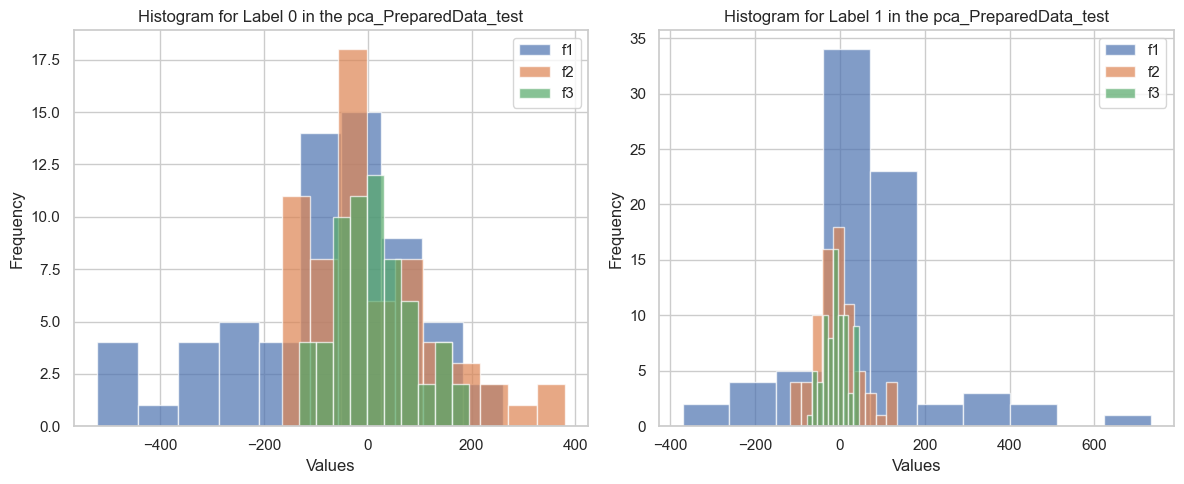

In [14]:

def visualize_label_histograms(dataframe, dataframe_name):
    # Create subplots for label 0 and label 1 histograms
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for label_value in [0, 1]:
        ax = axes[label_value]

        for column in dataframe.columns:
            if column != 'labels':
                data_to_plot = dataframe[dataframe['labels'] == label_value][column]
                ax.hist(data_to_plot, bins=10, alpha=0.7, label=column)

        ax.set_title(f"Histogram for Label {label_value} in the {dataframe_name}")
        ax.set_xlabel("Values")
        ax.set_ylabel("Frequency")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage
dataframe_name = "pca_PreparedData_test"  # Replace with the actual name of your DataFrame
visualize_label_histograms(pca_PreparedData_test, dataframe_name)


Visualize PCA Data

In [16]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Select the columns for standardization (z-score scaling)
columns_to_standardize = [col for col in pca_PreparedData_train.columns if col != 'labels']

# Fit and transform the selected columns in both DataFrames
pca_PreparedData_train[columns_to_standardize] = scaler.fit_transform(pca_PreparedData_train[columns_to_standardize])
pca_PreparedData_test[columns_to_standardize] = scaler.transform(pca_PreparedData_test[columns_to_standardize])

# pca_CombinedData_train
pca_PreparedData_test

,f1,f2,f3,labels
0,-0.489150,-0.563472,-1.033075,0
1,-0.550104,-0.556152,-1.035178,0
2,-0.520633,-0.579728,-1.074619,0
3,-0.401220,-0.533839,-1.143622,0
4,-0.072530,-0.677964,-1.383051,0
...,...,...,...,...
134,-0.041733,-0.014188,0.303233,1
135,-0.216577,-0.014450,-0.676406,1
136,0.691338,-0.351320,-0.943763,1
137,0.365410,0.254081,-0.278730,1


In [17]:
def visualize_3d_scatter(data, x_column, y_column, z_column, color_column):
    # Create a 3D scatter plot
    fig = px.scatter_3d(data, x=x_column, y=y_column, z=z_column, color=color_column)

    # Show the plot
    fig.show()

# Example usage:
# Call the function with your specific DataFrames and columns
visualize_3d_scatter(pca_PreparedData_test, 'f1', 'f2', 'f3', 'labels')

Visualize in Image data.

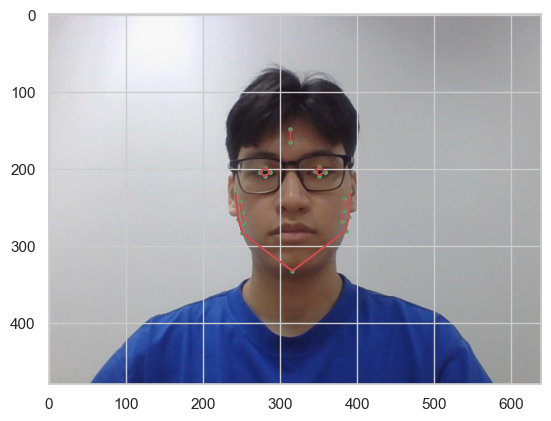

In [18]:

# Initialize MediaPipe Face Detection and Facial Landmarks models
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

# Define the indices of the desired keypoints (0 to 467)
cheeks = [234, 132,58,152,288, 361,454]
right_iris = [469, 470, 471, 472,469]
left_iris = [474, 475, 476, 477,474]
forehead = [151, 10]
maphai = [ 352, 376, 433]
matrai = [123, 147, 213]

desired_keypoint_indices = []
desired_keypoint_indices.append(cheeks)
desired_keypoint_indices.append(right_iris)
desired_keypoint_indices.append(left_iris)
desired_keypoint_indices.append(maphai)
desired_keypoint_indices.append(matrai)
desired_keypoint_indices.append(forehead)

image = cv2.imread(r'image_10.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

landmarks = face_mesh.process(rgb_image)

# Get the image size
ih, iw, _ = image.shape

if landmarks.multi_face_landmarks:
    for face_landmarks in landmarks.multi_face_landmarks:
        # Create a new figure and plot landmarks in a plot coordinate system
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw circles and lines only at the desired keypoints
        keypoints = [(int(landmark.x * iw), int(landmark.y * ih)) for landmark in face_landmarks.landmark]

        for indices in desired_keypoint_indices:
            keypoints_to_draw = [keypoints[index] for index in indices if index < len(keypoints)]

            for cx, cy in keypoints_to_draw:
                plt.scatter(cx, cy, s=5, c='g', marker='o')

            for i in range(len(keypoints_to_draw) - 1):
                x, y = zip(*keypoints_to_draw)
                plt.plot(x, y, color='r', linewidth=1)

        plt.show()




        plt.show()

# Close the OpenCV window
cv2.destroyAllWindows()

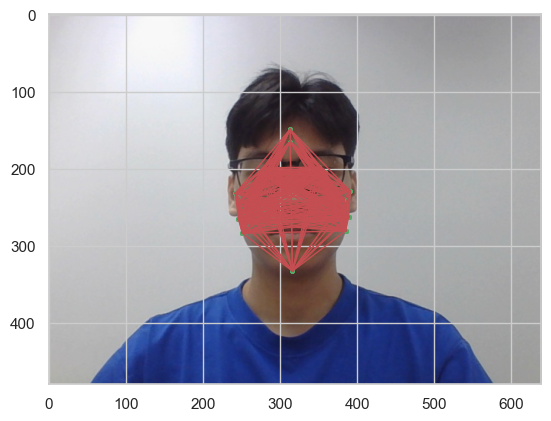

In [19]:
# Initialize MediaPipe Face Detection and Facial Landmarks models
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

# Define the indices of the desired keypoints (0 to 467)
cheeks = [234, 132, 58, 152, 288, 361, 454]
right_iris = [469, 470, 471, 472]
left_iris = [474, 475, 476, 477]
forehead = [151, 10]
maphai = [352, 376, 433]
matrai = [123, 147, 213]

desired_keypoint_indices = []
desired_keypoint_indices.extend(cheeks)
desired_keypoint_indices.extend(right_iris)
desired_keypoint_indices.extend(left_iris)
desired_keypoint_indices.extend(maphai)
desired_keypoint_indices.extend(matrai)
desired_keypoint_indices.extend(forehead)

image = cv2.imread('image_10.jpg')  # Make sure to use the correct image path
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

landmarks = face_mesh.process(rgb_image)

# Get the image size
ih, iw, _ = image.shape

if landmarks.multi_face_landmarks:
    for face_landmarks in landmarks.multi_face_landmarks:
        # Create a new figure and plot landmarks in a plot coordinate system
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw circles at the desired keypoints
        keypoints = [(int(landmark.x * iw), int(landmark.y * ih)) for landmark in face_landmarks.landmark]

        for i in range(len(desired_keypoint_indices)):
            for j in range(i + 1, len(desired_keypoint_indices)):
                index1 = desired_keypoint_indices[i]
                index2 = desired_keypoint_indices[j]
                if index1 < len(keypoints) and index2 < len(keypoints):
                    pt1 = keypoints[index1]
                    pt2 = keypoints[index2]
                    plt.scatter(pt1[0], pt1[1], s=5, c='g', marker='o')
                    plt.scatter(pt2[0], pt2[1], s=5, c='g', marker='o')
                    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1],], color='r', linewidth=1)

        plt.show()

# Close the OpenCV window
cv2.destroyAllWindows()


Visualize in 2D.

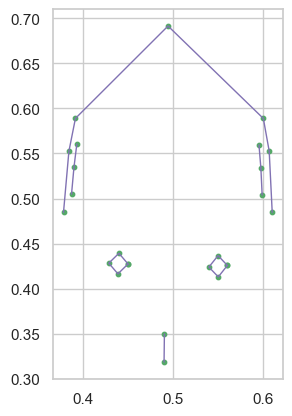

In [20]:

def visualize_keypoints(image_path, desired_keypoint_indices):
    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

    # Load the image
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        for face_landmarks in landmarks.multi_face_landmarks:
            # Create a new figure for the plot
            plt.figure()

            # Draw lines and keypoints
            for indices in desired_keypoint_indices:
                keypoints_to_draw = [(face_landmarks.landmark[index].x, face_landmarks.landmark[index].y) for index in indices]

                # Extract x and y coordinates
                x, y = zip(*keypoints_to_draw)

                # Plot lines
                plt.plot(x, y, color='m', linewidth=1)

                # Plot keypoints
                plt.scatter(x, y, s=10, c='g', marker='o')

            # Set the aspect ratio to equal for a square plot
            plt.gca().set_aspect('equal', adjustable='box')
            plt.show()

image_path = r'image_10.jpg'  # Replace with the path to your image
desired_keypoint_indices = [
 [234, 132, 58, 152, 288, 361, 454],
 [469, 470, 471, 472,469],
 [474, 475, 476, 477,474],
 [151, 10],
 [352, 376, 433],
 [123, 147, 213]
]

visualize_keypoints(image_path, desired_keypoint_indices)


Visual in 3D

In [21]:


def visualize_face_landmarks_3d(image_path):
    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

# Define the indices of the desired keypoints (0 to 467)
    cheeks = [234, 132,58,152,288, 361,454]
    right_iris = [469, 470, 471, 472,469]
    left_iris = [474, 475, 476, 477,474]
    forehead = [151, 10]
    maphai = [ 352, 376, 433]
    matrai = [123, 147, 213]

    desired_keypoint_indices = []
    desired_keypoint_indices.append(cheeks)
    desired_keypoint_indices.append(right_iris)
    desired_keypoint_indices.append(left_iris)
    desired_keypoint_indices.append(maphai)
    desired_keypoint_indices.append(matrai)
    desired_keypoint_indices.append(forehead)
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        # Create empty lists to store the 3D coordinates
        x, y, z = [], [], []

        for face_landmarks in landmarks.multi_face_landmarks:
            for indices in desired_keypoint_indices:
                for index in indices:
                    landmark = face_landmarks.landmark[index]
                    x.append(landmark.x)
                    y.append(landmark.y)
                    z.append(landmark.z)

        # Create a DataFrame from the coordinates
        df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

        # Create a 3D scatter plot using Plotly Express with smaller keypoint markers
        fig = px.scatter_3d(df, x='X', y='Y', z='Z', labels={'X': 'X', 'Y': 'Y', 'Z': 'Z'},
                            color_discrete_sequence=['blue'], opacity=0.7, size_max=1.5)
        fig.update_traces(marker=dict(size=3))  # Adjust the marker size here
        fig.show()

# Example usage:
image_path = r'image_10.jpg'  # Replace with the path to your image
visualize_face_landmarks_3d(image_path)


Visual all keypoints FaceMesh in 3D.

In [22]:


def visualize_3d_landmarks(image_path):
    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh()

    # Load the image
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        # Create empty lists to store the 3D coordinates
        x = []
        y = []
        z = []

        for face_landmarks in landmarks.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                x.append(landmark.x)
                y.append(landmark.y)
                z.append(landmark.z)

        # Create a DataFrame from the coordinates
        df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

        # Create a 3D scatter plot using Plotly Express with a smaller marker size
        fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=df.index, labels={'X': 'X', 'Y': 'Y', 'Z': 'Z'})
        fig.update_traces(marker=dict(size=2))# Adjust the size_max to your preference
        fig.show()

image_path = r'image_10.jpg'  # Replace with the path to your image
visualize_3d_landmarks(image_path)
